<a href="https://colab.research.google.com/github/jiseokkang/jiseok/blob/main/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5_Lec10_%EC%8B%A4%EC%8A%B5%EC%9E%90%EB%A3%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

단 1 개의 레이어로 이루어진 신경망의 예 (실행하지 않기!)

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(1, input_dim=2, activation='sigmoid'))

In [ ]:
model.compile(optimizer='SGD', loss='binary_crossentropy')

In [ ]:
history = model.fit(X_train, y_train)

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(4, input_dim=2))
model.add(layers.Dense(1, activation='Sigmoid'))

model.compile(optimizer='SGD', loss='binary_crossentropy')
history = model.fit(X_train, y_train)



---


>여기 아래서부터 실행가능


---



이진분류

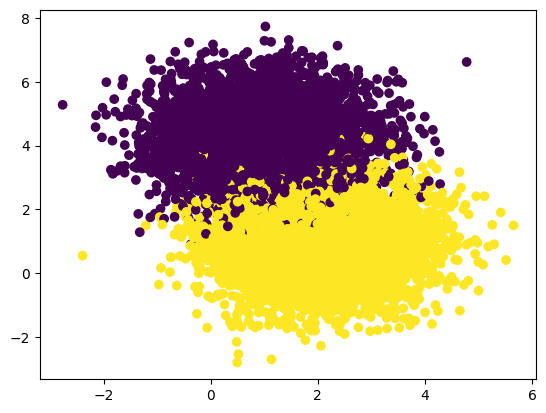

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

data, labels = make_blobs(n_samples=10000, n_features=2,
centers=2, random_state=0)
plt.scatter(data[:,0], data[:,1], c=labels)
plt.show()

첫 5개의 data와 라벨을 출력

In [3]:
print(data[:5])
print(labels[:5])

[[0.80901751 3.69975424]
 [1.17304017 5.27341106]
 [2.50904929 5.7731461 ]
 [3.00805773 0.69934352]
 [1.834194   5.44488919]]
[0 0 0 1 0]


훈련 데이터와 테스트 데이터로 분류

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2)

In [5]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(1, input_dim=2, activation='sigmoid'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


GPU 사용: 런타임 > 런타임유형변경 > 하드웨어가속기 GPU 선택

In [7]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [8]:
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

모델을 훈련

In [9]:
model.fit(X_train, y_train, epochs = 40, batch_size=100)

Epoch 1/40
80/80 [==============================] - 2s 2ms/step - loss: 0.4155 - accuracy: 0.7911
Epoch 2/40
80/80 [==============================] - 0s 3ms/step - loss: 0.3347 - accuracy: 0.9003
Epoch 3/40
80/80 [==============================] - 0s 4ms/step - loss: 0.2952 - accuracy: 0.9181
Epoch 4/40
80/80 [==============================] - 0s 3ms/step - loss: 0.2701 - accuracy: 0.9239
Epoch 5/40
80/80 [==============================] - 0s 5ms/step - loss: 0.2525 - accuracy: 0.9258
Epoch 6/40
80/80 [==============================] - 0s 4ms/step - loss: 0.2394 - accuracy: 0.9274
Epoch 7/40
80/80 [==============================] - 0s 4ms/step - loss: 0.2293 - accuracy: 0.9301
Epoch 8/40
80/80 [==============================] - 0s 4ms/step - loss: 0.2211 - accuracy: 0.9309
Epoch 9/40
80/80 [==============================] - 0s 5ms/step - loss: 0.2144 - accuracy: 0.9310
Epoch 10/40
80/80 [==============================] - 0s 5ms/step - loss: 0.2088 - accuracy: 0.9314
Epoch 11/40
80/80 [

성능 평가

In [10]:
result = model.evaluate(X_test, y_test)
result

63/63 [==============================] - 0s 2ms/step - loss: 0.1561 - accuracy: 0.9430


[0.15607333183288574, 0.9430000185966492]

그래프

In [11]:
weights, bias = model.get_weights()
print(weights)
print(bias)

[[ 1.4790069]
 [-1.5650889]]
[1.4049641]


In [12]:
a = -(weights[0]/weights[1])/(weights[0]/bias)
b = -weights[0]/weights[1]

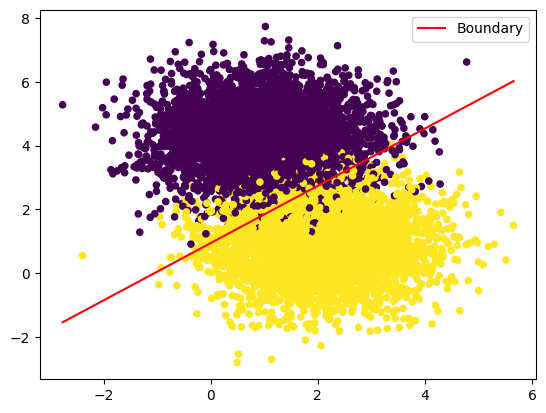

In [13]:
import numpy as np

x = np.linspace(np.amin(X_train[:,0]), np.amax(X_train[:,0]))
plt.figure()
y = [a*i + b for i in x]
plt.plot(x, y, color='red', label='Boundary')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20)
plt.legend()

In [14]:
test = np.array([[2, -2], [2, 2.5], [2, 4]])
pred = model.predict(test)
print(pred)

1/1 [==============================] - 0s 63ms/step
[[0.9994435 ]
 [0.6107    ]
 [0.13040556]]


다중분류

In [15]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

원-핫 인코딩(One-Hot Encoding)

In [16]:
import tensorflow as tf
y_train = tf.one_hot(y_train, 3)
y_test = tf.one_hot(y_test, 3)



---


>다중분류 모델


---



In [17]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(2, input_shape=(4, )))
model.add(layers.Dense(3, activation='softmax'))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 2)                 10        
                                                                 
 dense_2 (Dense)             (None, 3)                 9         
                                                                 
Total params: 19 (76.00 Byte)
Trainable params: 19 (76.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

모델을 훈련

In [20]:
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 7ms/step - loss: 6.0081
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 5.7489
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 5.5586
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 5.3916
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 5.2364
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 5.0932
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 4.9553
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 4.8243
Epoch 9/100
4/4 [==============================] - 0s 5ms/step - loss: 4.6973
Epoch 10/100
4/4 [==============================] - 0s 5ms/step - loss: 4.5743
Epoch 11/100
4/4 [==============================] - 0s 5ms/step - loss: 4.4585
Epoch 12/100
4/4 [==============================] - 0s 5ms/step - loss: 4.3481
Epoch 13/100
4/4 [==============================] - 0s 4ms/st

성능 평가

In [21]:
results = model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 93ms/step - loss: 0.7171


In [22]:
prediction = model.predict(X_test)
print(prediction)

1/1 [==============================] - 0s 94ms/step
[[0.6547433  0.13522024 0.21003643]
 [0.18563566 0.42917135 0.38519302]
 [0.22110312 0.41724256 0.36165434]
 [0.62698644 0.14885855 0.22415501]
 [0.07069827 0.6029452  0.32635656]
 [0.63818914 0.1407204  0.22109048]
 [0.09629504 0.5064759  0.39722905]
 [0.1816603  0.42498854 0.39335117]
 [0.18944956 0.43916324 0.37138715]
 [0.19518569 0.4331122  0.37170208]
 [0.70291704 0.11678537 0.18029758]
 [0.07437649 0.5164848  0.4091387 ]
 [0.6512583  0.13602734 0.21271436]
 [0.20759232 0.4127941  0.37961358]
 [0.22995551 0.396987   0.37305748]
 [0.2043843  0.4246702  0.37094548]
 [0.07028994 0.53517056 0.3945395 ]
 [0.68732053 0.12541643 0.18726303]
 [0.10683715 0.5187917  0.3743712 ]
 [0.6749396  0.1300154  0.19504502]
 [0.7197148  0.11016484 0.17012031]
 [0.08319699 0.5342558  0.38254723]
 [0.6715685  0.13083453 0.19759694]
 [0.12246321 0.5108842  0.36665258]
 [0.18685566 0.46736374 0.3457806 ]
 [0.2217896  0.4095592  0.36865115]
 [0.6426283 

In [23]:
print(X_test[:1])
prediction = model.predict(X_test[:1])
print(prediction)

[[4.8 3.4 1.6 0.2]]
1/1 [==============================] - 0s 18ms/step
[[0.6547433  0.13522024 0.21003643]]




---


>회귀모델


---



In [24]:
import pandas as pd
import keras
import numpy as np

#column_names = ['연비','기통수','배기량','마력','중량',
 #               '가속력', '연식', 'origin']
column_names = ['연비','기통수','배기량','마력','중량',
                '가속력', '연식', '제조국가']
dataset = pd.read_csv('/content/sample_data/automobile.csv', names=column_names, comment='\t', sep=',', skipinitialspace=True)
# dataset.columns = column_names

dataset.head(3)

,연비,기통수,배기량,마력,중량,가속력,연식,제조국가
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1


칼럼별로 nan 데이터의 개수의 합을 출력

In [25]:
dataset.isnull().sum()

연비      0
기통수     0
배기량     0
마력      0
중량      0
가속력     0
연식      0
제조국가    0
dtype: int64

nan 데이터를 삭제

In [26]:
dataset = dataset.dropna()

제조국가 칼럼을 삭제

In [27]:
dataset.pop('제조국가')
dataset.head(3)

,연비,기통수,배기량,마력,중량,가속력,연식
0,18.0,8,307.0,130,3504,12.0,70
1,15.0,8,350.0,165,3693,11.5,70
2,18.0,8,318.0,150,3436,11.0,70


전체 데이터 중 일부를 훈련 데이터로 분리

In [28]:
len(dataset.index)

398

데이터 정규화 및 350개의 샘플을 추출

In [29]:
train_data = dataset.sample(350)
len(train_data)

350

In [30]:
test_data = dataset.drop(train_data.index)
len(test_data.index)

48

In [31]:
y_train = train_data['연비']
y_test = test_data['연비']
y_test.head(3)

0     18.0
1     15.0
19    26.0
Name: 연비, dtype: float64

In [32]:
train_data.pop('연비')
test_data.pop('연비')
train_data[:3]

,기통수,배기량,마력,중량,가속력,연식
72,8,304.0,150,3892,12.5,72
257,6,232.0,90,3210,17.2,78
346,4,97.0,67,2065,17.8,81


In [33]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()

model.add(layers.Dense(32, activation='relu', input_dim=len(train_data.keys())))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                224       
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2401 (9.38 KB)
Trainable params: 2401 (9.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [36]:
history = model.fit(train_data, y_train, validation_split=0.2, epochs=200)

Epoch 1/200
9/9 [==============================] - 2s 32ms/step - loss: 4011.7161 - mae: 44.3213 - val_loss: 251.5017 - val_mae: 13.6086
Epoch 2/200
9/9 [==============================] - 0s 8ms/step - loss: 468.1841 - mae: 17.1536 - val_loss: 3949.7483 - val_mae: 62.2584
Epoch 3/200
9/9 [==============================] - 0s 8ms/step - loss: 1971.3613 - mae: 40.2791 - val_loss: 2046.0828 - val_mae: 37.0003
Epoch 4/200
9/9 [==============================] - 0s 6ms/step - loss: 556.2854 - mae: 18.6602 - val_loss: 1122.4940 - val_mae: 26.2413
Epoch 5/200
9/9 [==============================] - 0s 8ms/step - loss: 1751.1790 - mae: 36.3354 - val_loss: 1544.5730 - val_mae: 38.6450
Epoch 6/200
9/9 [==============================] - 0s 6ms/step - loss: 1658.6124 - mae: 36.9695 - val_loss: 1389.1854 - val_mae: 29.7731
Epoch 7/200
9/9 [==============================] - 0s 6ms/step - loss: 735.4614 - mae: 22.6638 - val_loss: 2304.5222 - val_mae: 47.4446
Epoch 8/200
9/9 [===========================

In [37]:
mse, mae = model.evaluate(train_data, y_train)

11/11 [==============================] - 0s 2ms/step - loss: 151.9540 - mae: 11.0532


In [38]:
test_data[:1]

,기통수,배기량,마력,중량,가속력,연식
0,8,307.0,130,3504,12.0,70


In [39]:
prediction = model.predict(test_data[:1])
print('예측: ', prediction)
print('MAE :', mae)

1/1 [==============================] - 0s 47ms/step
예측:  [[26.614813]]
MAE : 11.05324935913086
